# STA 6543: Predictive Modeing
# Project 

Name:

    Angel Manuel Perez

# Background
## A national veterans’ organization wishes to develop a predictive model to improve the cost-effectiveness of their direct marketing campaign. The organization, with its in-house database of over 13 million donors, is one of the largest direct-mail fundraisers in the United States. According to their recent mailing records, the overall response rate is 5.1%. Out of those who responded (donated), the average donation is `$13.00.` Each mailing, which includes a gift of personalized address labels and assortments of cards and envelopes, costs $0.68 to produce and send. Using these facts, we take a sample of this dataset to develop a classification model that can effectively capture donors so that the expected net profit is maximized. Weighted sampling was used, under-representing the non-responders so that the sample has equal numbers of donors and non-donors.

# Data
## The fundraising training file Download fundraising training file contains 3,000 records with approximately 50% donors (target = Donor) and 50% non-donors (target = No Donor).

# Step 1: 
## Partitioning. You might think about how to estimate the out of sample error. Either partition the dataset into 80% training and 20% validation or use cross validation (set the seed to 12345).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

np.random.seed(12345)
# Load the dataset
data = pd.read_csv("data/fundraising.csv")
data.head()

zipconvert2 zipconvert3 zipconvert4 zipconvert5 homeowner  num_child  \
0         Yes          No          No          No       Yes          1   
1          No          No          No         Yes        No          2   
2          No          No          No         Yes       Yes          1   
3          No         Yes          No          No       Yes          1   
4          No         Yes          No          No       Yes          1   

   income female  wealth  home_value  ...  avg_fam_inc  pct_lt15k  num_prom  \
0       1     No       7         698  ...          463          4        46   
1       5    Yes       8         828  ...          376         13        32   
2       3     No       4        1471  ...          546          4        94   
3       4     No       8         547  ...          432          7        20   
4       4    Yes       8         482  ...          275         28        38   

   lifetime_gifts  largest_gift  last_gift  months_since_donate  time_lag  \
0            94.0          12.0       12.0                   34         6   
1            30.0          10.0        5.0                   29         7   
2           177.0          10.0        8.0                   30         3   
3            23.0          11.0       11.0                   30         6   
4            73.0          10.0       10.0                   31         3   

   avg_gift    target  
0  9.400000     Donor  
1  4.285714     Donor  
2  7.080000  No Donor  
3  7.666667  No Donor  
4  7.300000     Donor  

[5 rows x 21 columns]

In [2]:
# Split features and target variable
X = data.drop(columns=['target'])
y = data['target']

# Partitioning into 80% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=12345)

# Step 2: 
## Model Building. Follow the following steps to build, evaluate, and choose a model.

### 1. Exploratory data analysis. Examine the predictors and evaluate their association with the response variable. Which might be good candidate predictors? Are any collinear with each other?

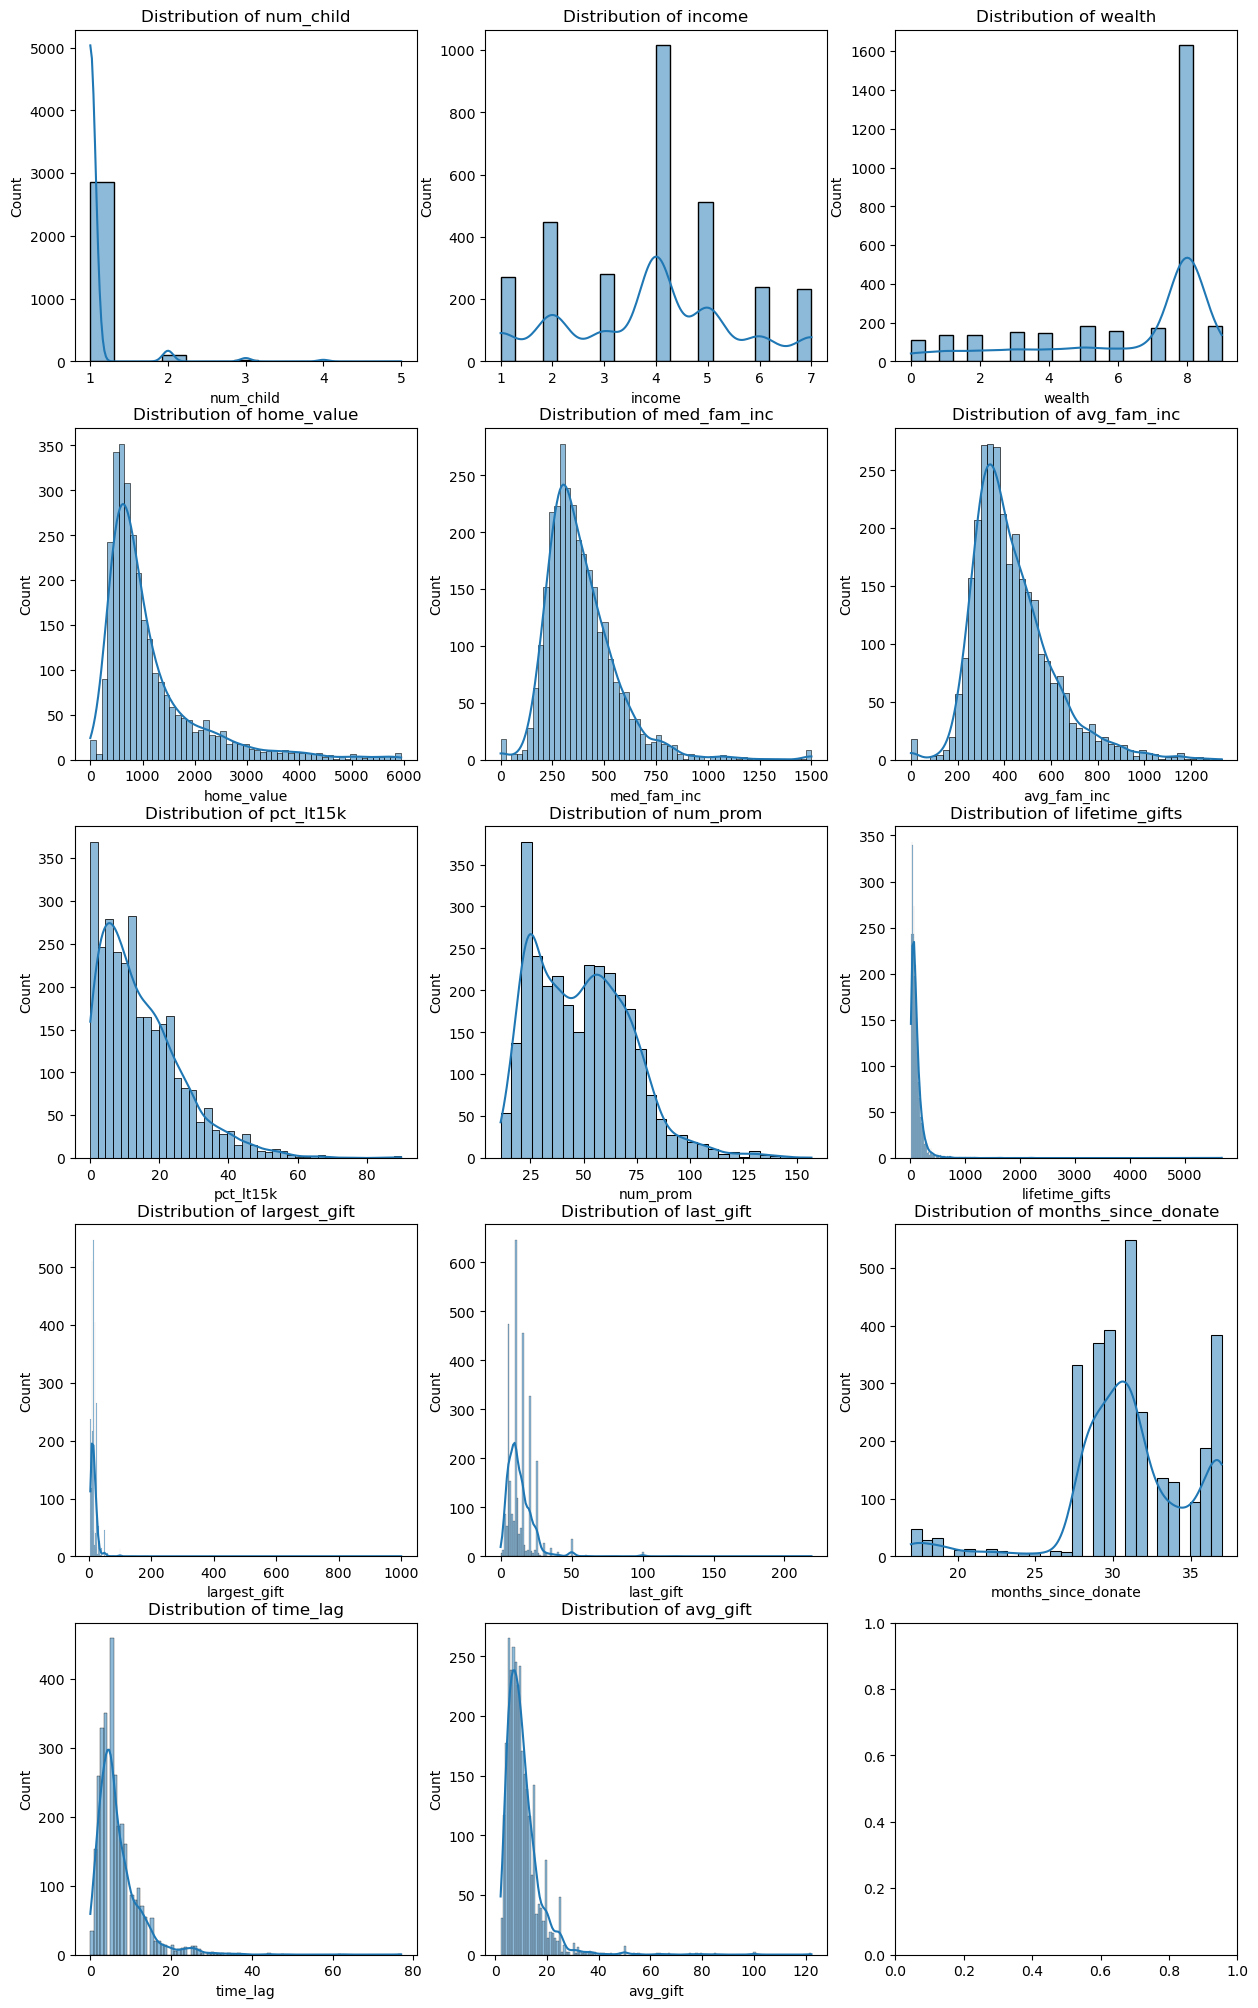

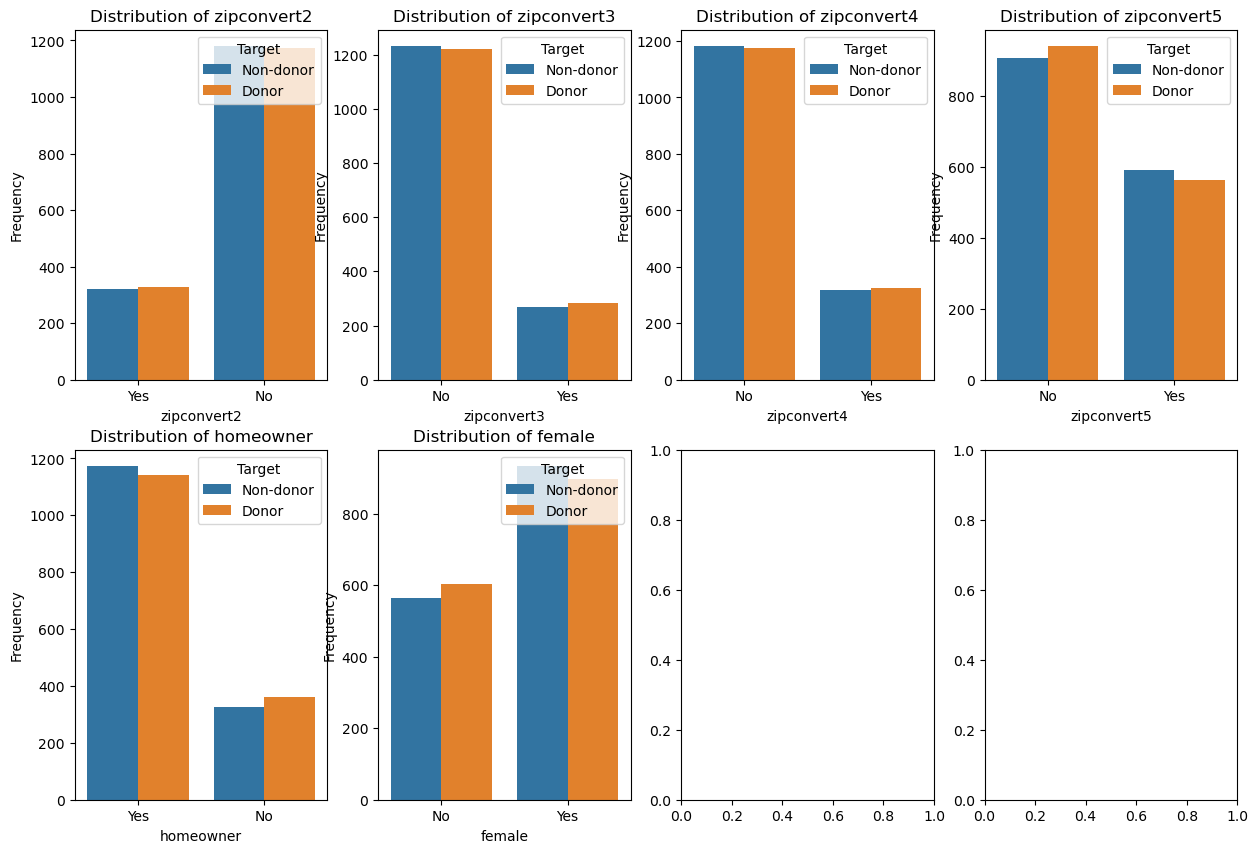

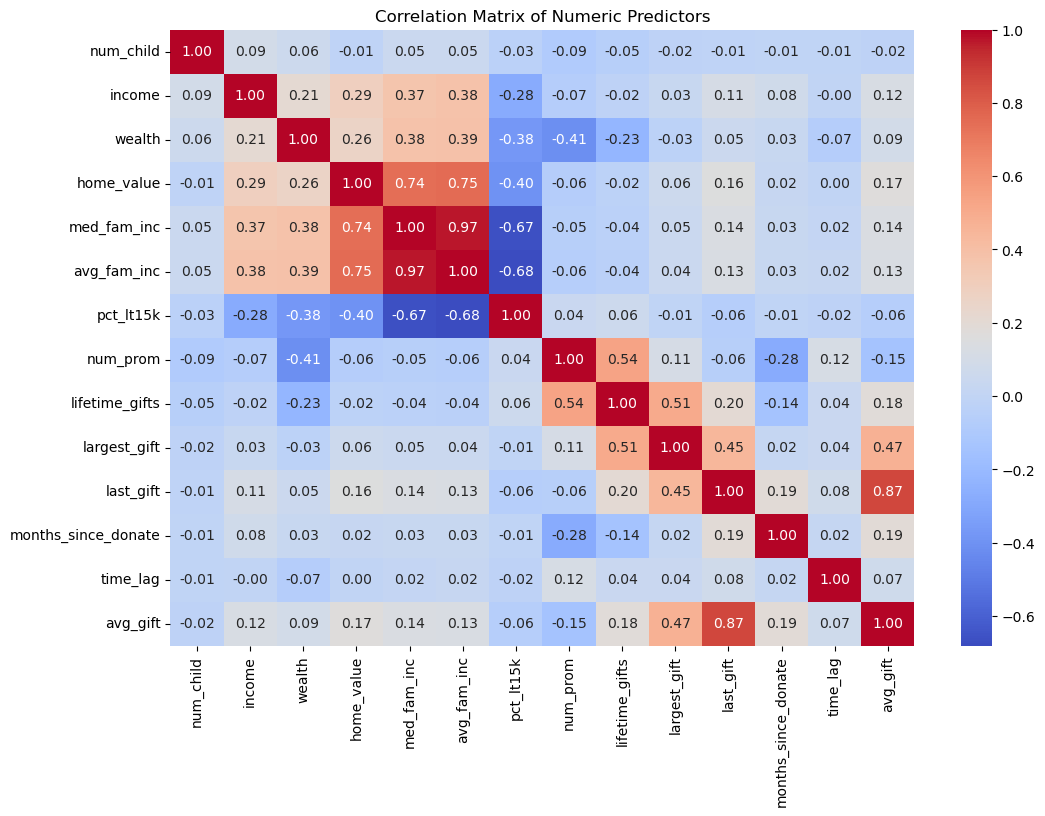

Correlation Matrix:


num_child    income    wealth  home_value  med_fam_inc  \
num_child             1.000000  0.091893  0.060176   -0.011964     0.046962   
income                0.091893  1.000000  0.208993    0.291973     0.367505   
wealth                0.060176  0.208993  1.000000    0.261161     0.377763   
home_value           -0.011964  0.291973  0.261161    1.000000     0.738153   
med_fam_inc           0.046962  0.367505  0.377763    0.738153     1.000000   
avg_fam_inc           0.047261  0.378585  0.385892    0.752569     0.972271   
pct_lt15k            -0.031718 -0.283191 -0.375146   -0.399086    -0.665363   
num_prom             -0.086433 -0.069009 -0.412118   -0.064514    -0.050783   
lifetime_gifts       -0.050955 -0.019565 -0.225473   -0.024074    -0.035246   
largest_gift         -0.017554  0.033181 -0.025277    0.056494     0.047032   
last_gift            -0.012949  0.109593  0.052591    0.158858     0.135976   
months_since_donate  -0.005564  0.077239  0.033714    0.023429     0.032337   
time_lag             -0.006069 -0.001546 -0.066421    0.000679     0.015202   
avg_gift             -0.019689  0.124056  0.091079    0.168774     0.137163   

                     avg_fam_inc  pct_lt15k  num_prom  lifetime_gifts  \
num_child               0.047261  -0.031718 -0.086433       -0.050955   
income                  0.378585  -0.283191 -0.069009       -0.019565   
wealth                  0.385892  -0.375146 -0.412118       -0.225473   
home_value              0.752569  -0.399086 -0.064514       -0.024074   
med_fam_inc             0.972271  -0.665363 -0.050783       -0.035246   
avg_fam_inc             1.000000  -0.680285 -0.057311       -0.040327   
pct_lt15k              -0.680285   1.000000  0.037775        0.059619   
num_prom               -0.057311   0.037775  1.000000        0.538620   
lifetime_gifts         -0.040327   0.059619  0.538620        1.000000   
largest_gift            0.043104  -0.007883  0.113810        0.507262   
last_gift               0.131379  -0.061752 -0.055868        0.202058   
months_since_donate     0.031269  -0.009015 -0.282322       -0.144622   
time_lag                0.024340  -0.019911  0.119623        0.038546   
avg_gift                0.131758  -0.062481 -0.147251        0.182324   

                     largest_gift  last_gift  months_since_donate  time_lag  \
num_child               -0.017554  -0.012949            -0.005564 -0.006069   
income                   0.033181   0.109593             0.077239 -0.001546   
wealth                  -0.025277   0.052591             0.033714 -0.066421   
home_value               0.056494   0.158858             0.023429  0.000679   
med_fam_inc              0.047032   0.135976             0.032337  0.015202   
avg_fam_inc              0.043104   0.131379             0.031269  0.024340   
pct_lt15k               -0.007883  -0.061752            -0.009015 -0.019911   
num_prom                 0.113810  -0.055868            -0.282322  0.119623   
lifetime_gifts           0.507262   0.202058            -0.144622  0.038546   
largest_gift             1.000000   0.447237             0.019790  0.039977   
last_gift                0.447237   1.000000             0.186715  0.075111   
months_since_donate      0.019790   0.186715             1.000000  0.015528   
time_lag                 0.039977   0.075111             0.015528  1.000000   
avg_gift                 0.474830   0.866400             0.189111  0.070082   

                     avg_gift  
num_child           -0.019689  
income               0.124056  
wealth               0.091079  
home_value           0.168774  
med_fam_inc          0.137163  
avg_fam_inc          0.131758  
pct_lt15k           -0.062481  
num_prom            -0.147251  
lifetime_gifts       0.182324  
largest_gift         0.474830  
last_gift            0.866400  
months_since_donate  0.189111  
time_lag             0.070082  
avg_gift             1.000000


Highly Correlated Pairs (correlation coefficient > 0.7):
   Predictor 1  Predictor 2  Correlation Coefficient
0   home_value  med_fam_inc                 0.738153
1   home_value  avg_fam_inc                 0.752569
2  med_fam_inc  avg_fam_inc                 0.972271
3    last_gift     avg_gift                 0.866400


In [3]:
# List of predictors
numeric_predictors = ['num_child', 'income', 'wealth', 'home_value', 'med_fam_inc', 'avg_fam_inc', 'pct_lt15k',
                      'num_prom', 'lifetime_gifts', 'largest_gift', 'last_gift', 'months_since_donate', 'time_lag', 'avg_gift']
categorical_predictors = ['zipconvert2', 'zipconvert3', 'zipconvert4', 'zipconvert5', 'homeowner', 'female']

# Arrange plots in rows of 3 or 4
def plot_in_rows(predictors, ncols=3):
    nrows = (len(predictors) + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))
    axes = axes.flatten()
    for i, predictor in enumerate(predictors):
        ax = axes[i]
        if predictor in numeric_predictors:
            sns.histplot(data[predictor], kde=True, ax=ax)
            ax.set_xlabel(predictor)
        else:
            sns.countplot(x=predictor, hue='target', data=data, ax=ax)
            ax.legend(title='Target', loc='upper right', labels=['Non-donor', 'Donor'])
            ax.set_ylabel('Frequency')
        ax.set_title(f'Distribution of {predictor}')

# Plot numeric predictors
plot_in_rows(numeric_predictors)

# Plot categorical predictors
plot_in_rows(categorical_predictors, ncols=4)

# Correlation analysis
correlation_matrix = data[numeric_predictors].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Predictors')
plt.show()

# Correlation Matrix
correlation_matrix = data[numeric_predictors].corr()

# Correlation Matrix DataFrame
correlation_matrix_df = pd.DataFrame(correlation_matrix, columns=numeric_predictors, index=numeric_predictors)
print("Correlation Matrix:")
display(correlation_matrix_df)

# Identify highly correlated pairs
highly_correlated_pairs = []
for i in range(len(numeric_predictors)):
    for j in range(i+1, len(numeric_predictors)):
        predictor1 = numeric_predictors[i]
        predictor2 = numeric_predictors[j]
        correlation_coefficient = correlation_matrix.loc[predictor1, predictor2]
        if abs(correlation_coefficient) > 0.7:
            highly_correlated_pairs.append((predictor1, predictor2, correlation_coefficient))

# Highly Correlated Pairs DataFrame
if highly_correlated_pairs:
    highly_correlated_pairs_df = pd.DataFrame(highly_correlated_pairs, columns=["Predictor 1", "Predictor 2", "Correlation Coefficient"])
    print("\nHighly Correlated Pairs (correlation coefficient > 0.7):")
    print(highly_correlated_pairs_df)
else:
    print("\nNo highly correlated pairs found (correlation coefficient > 0.7).")

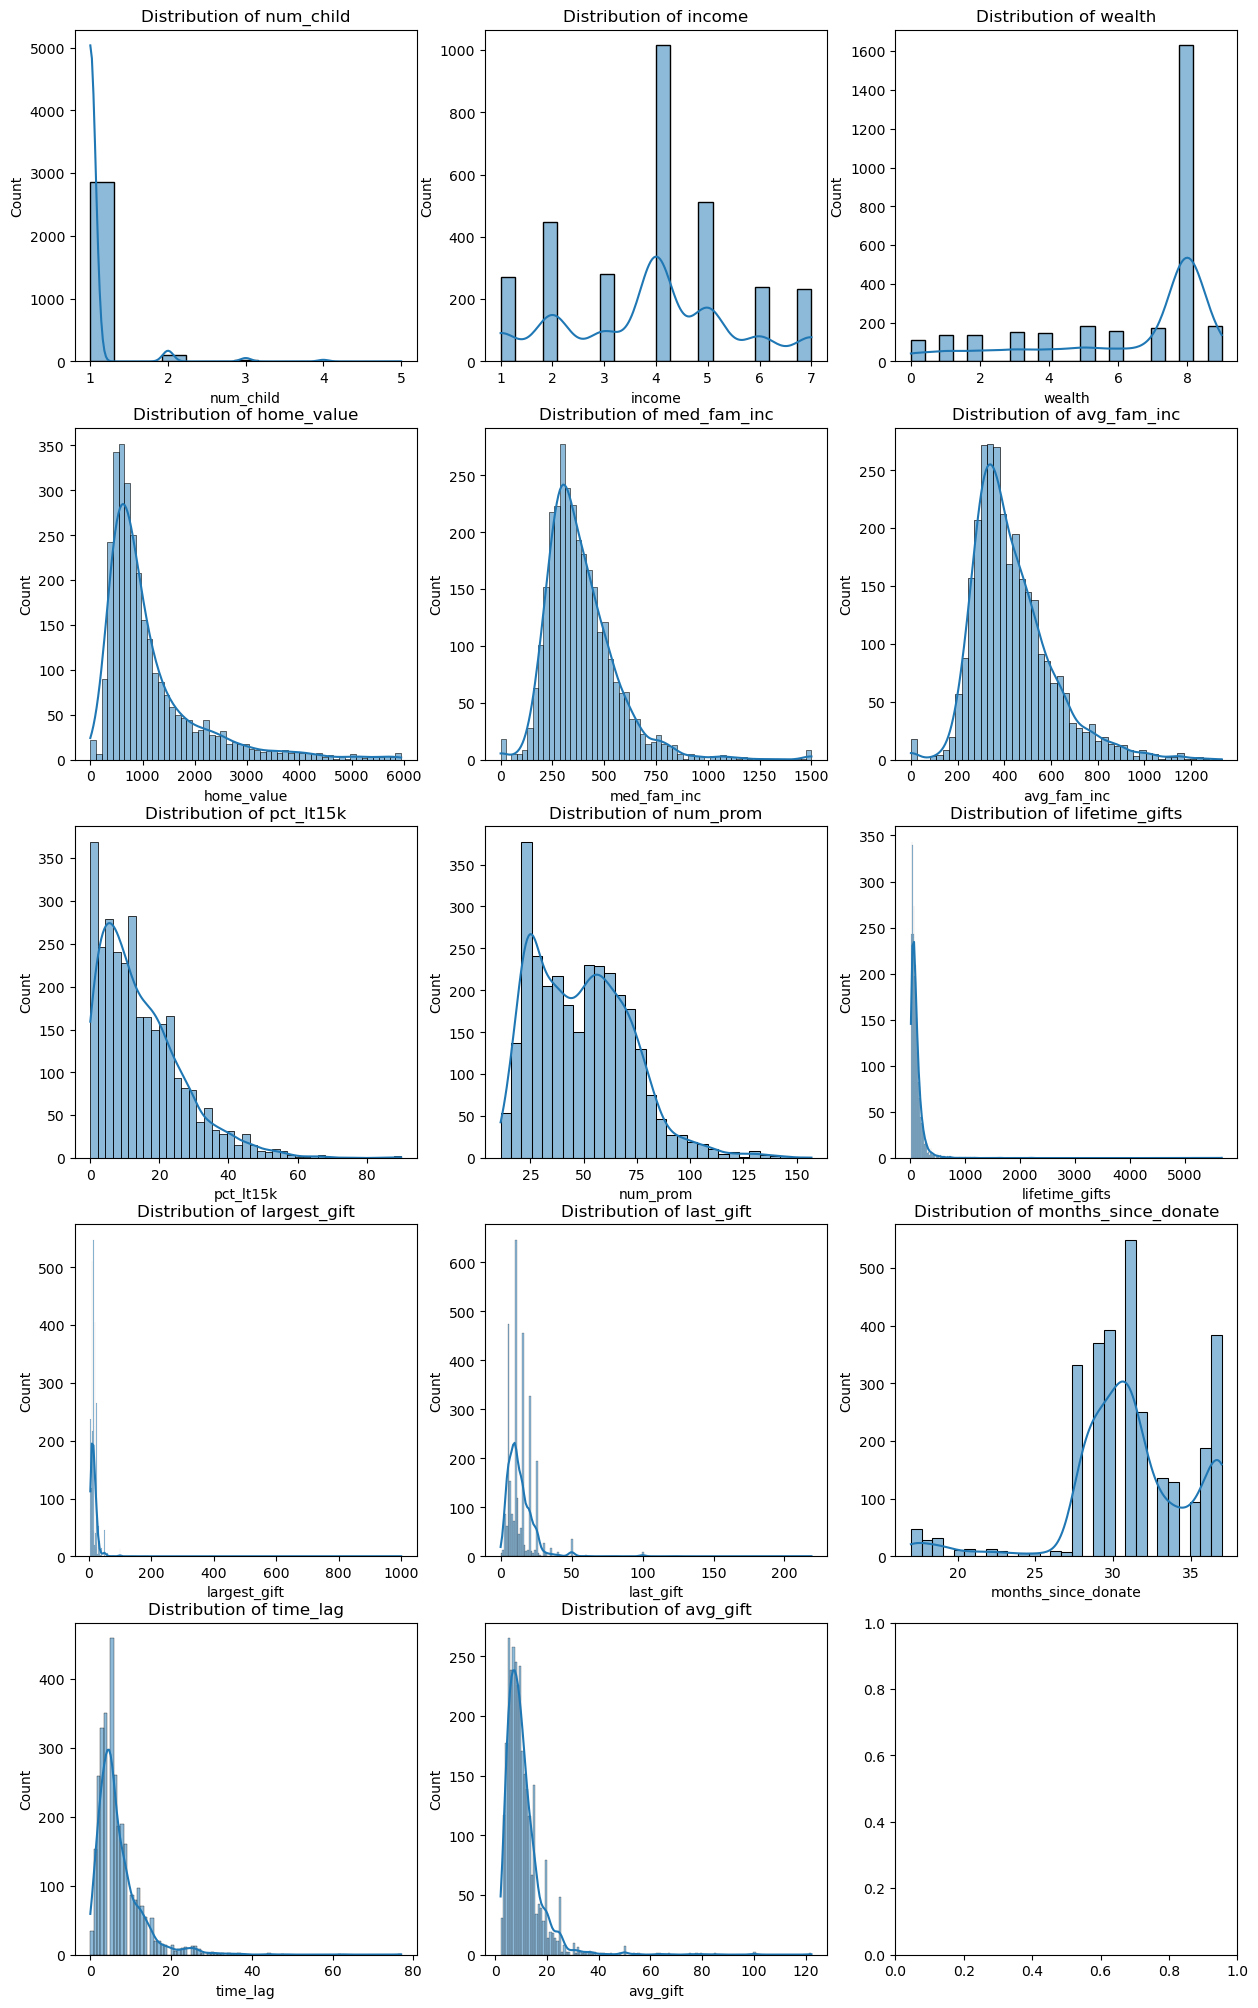

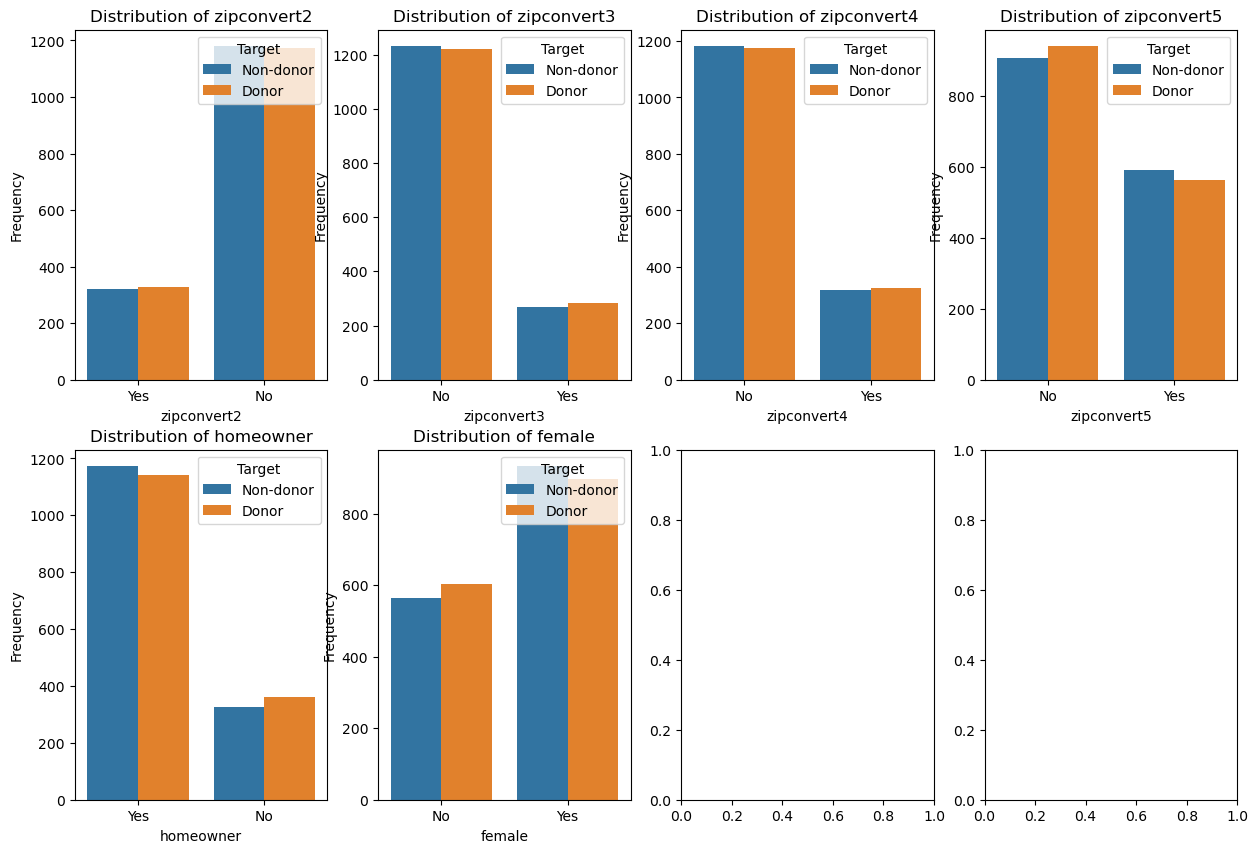

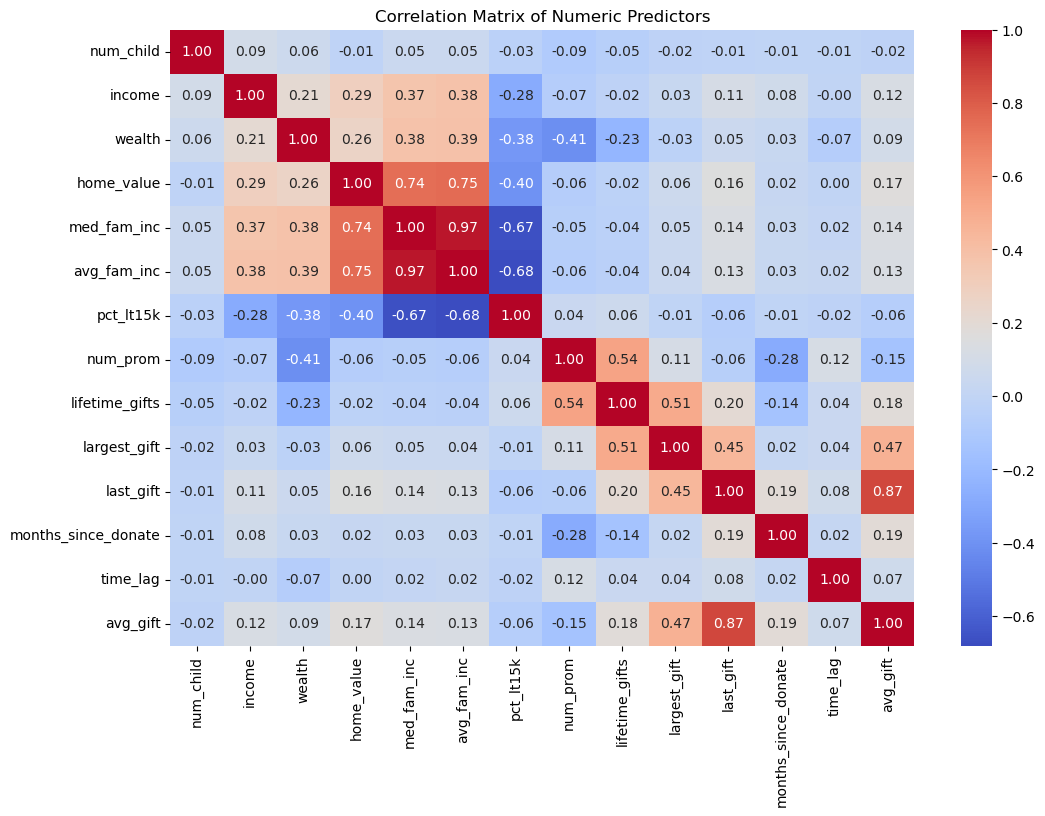

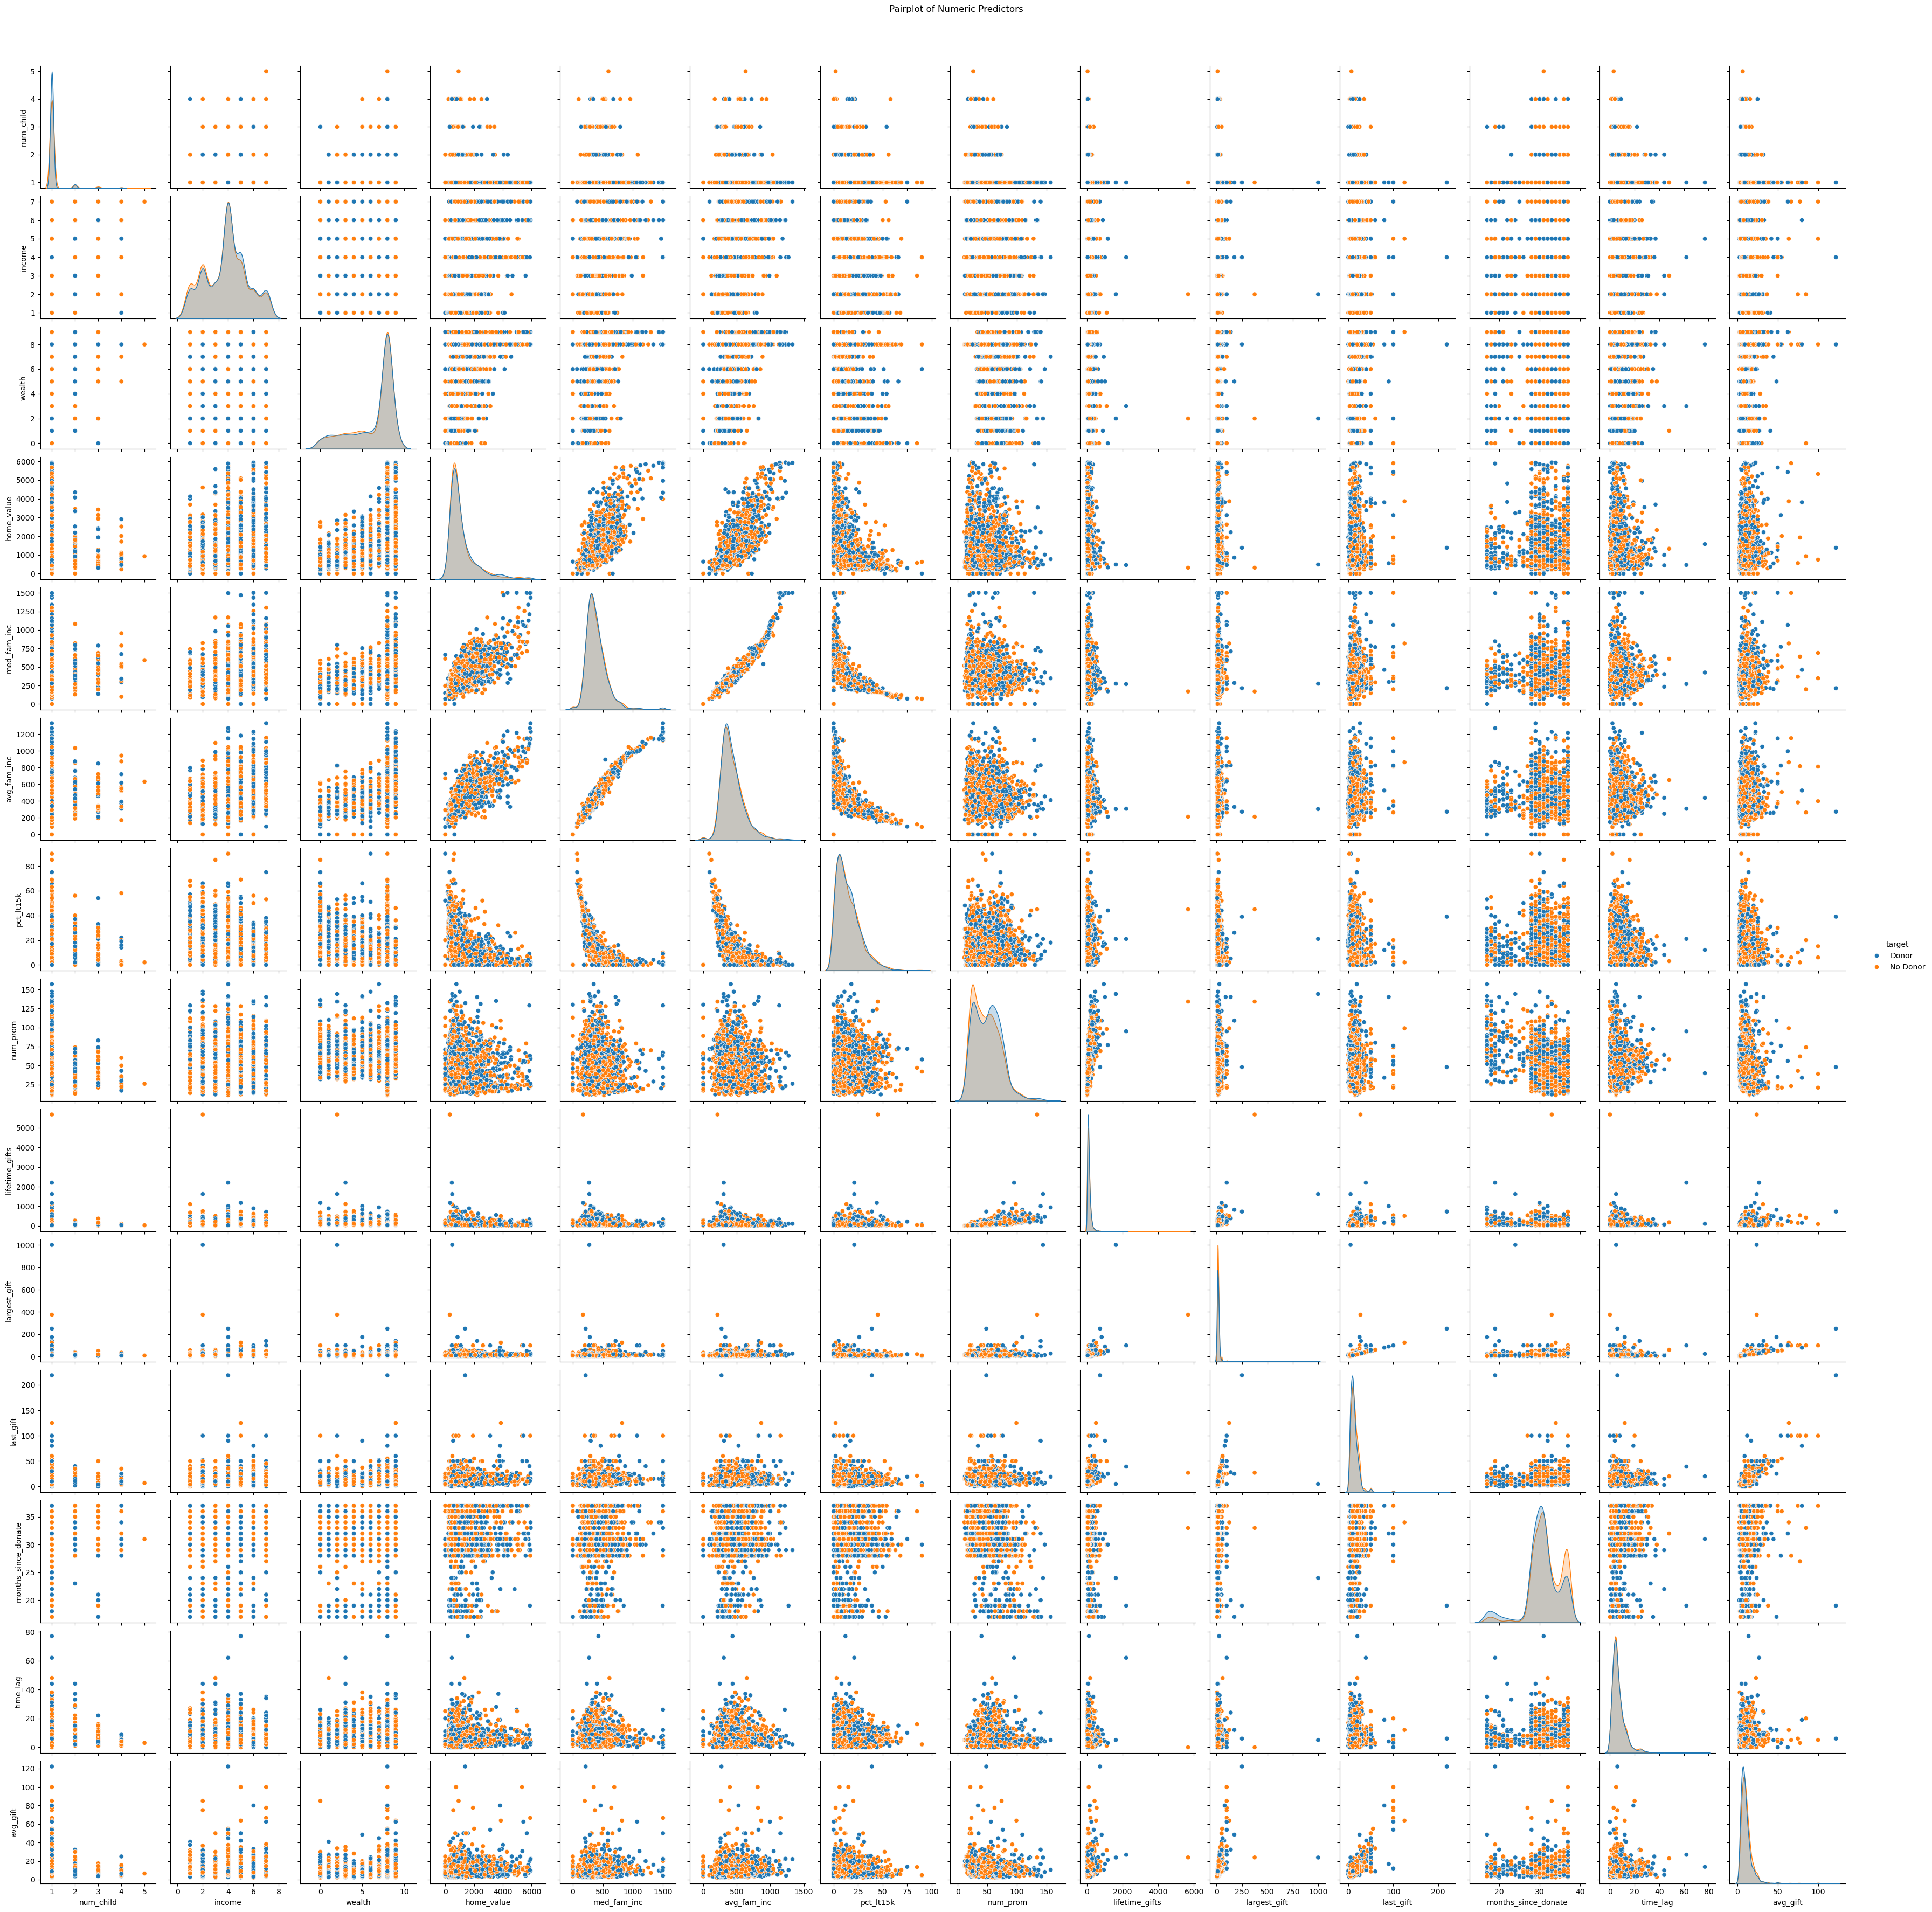

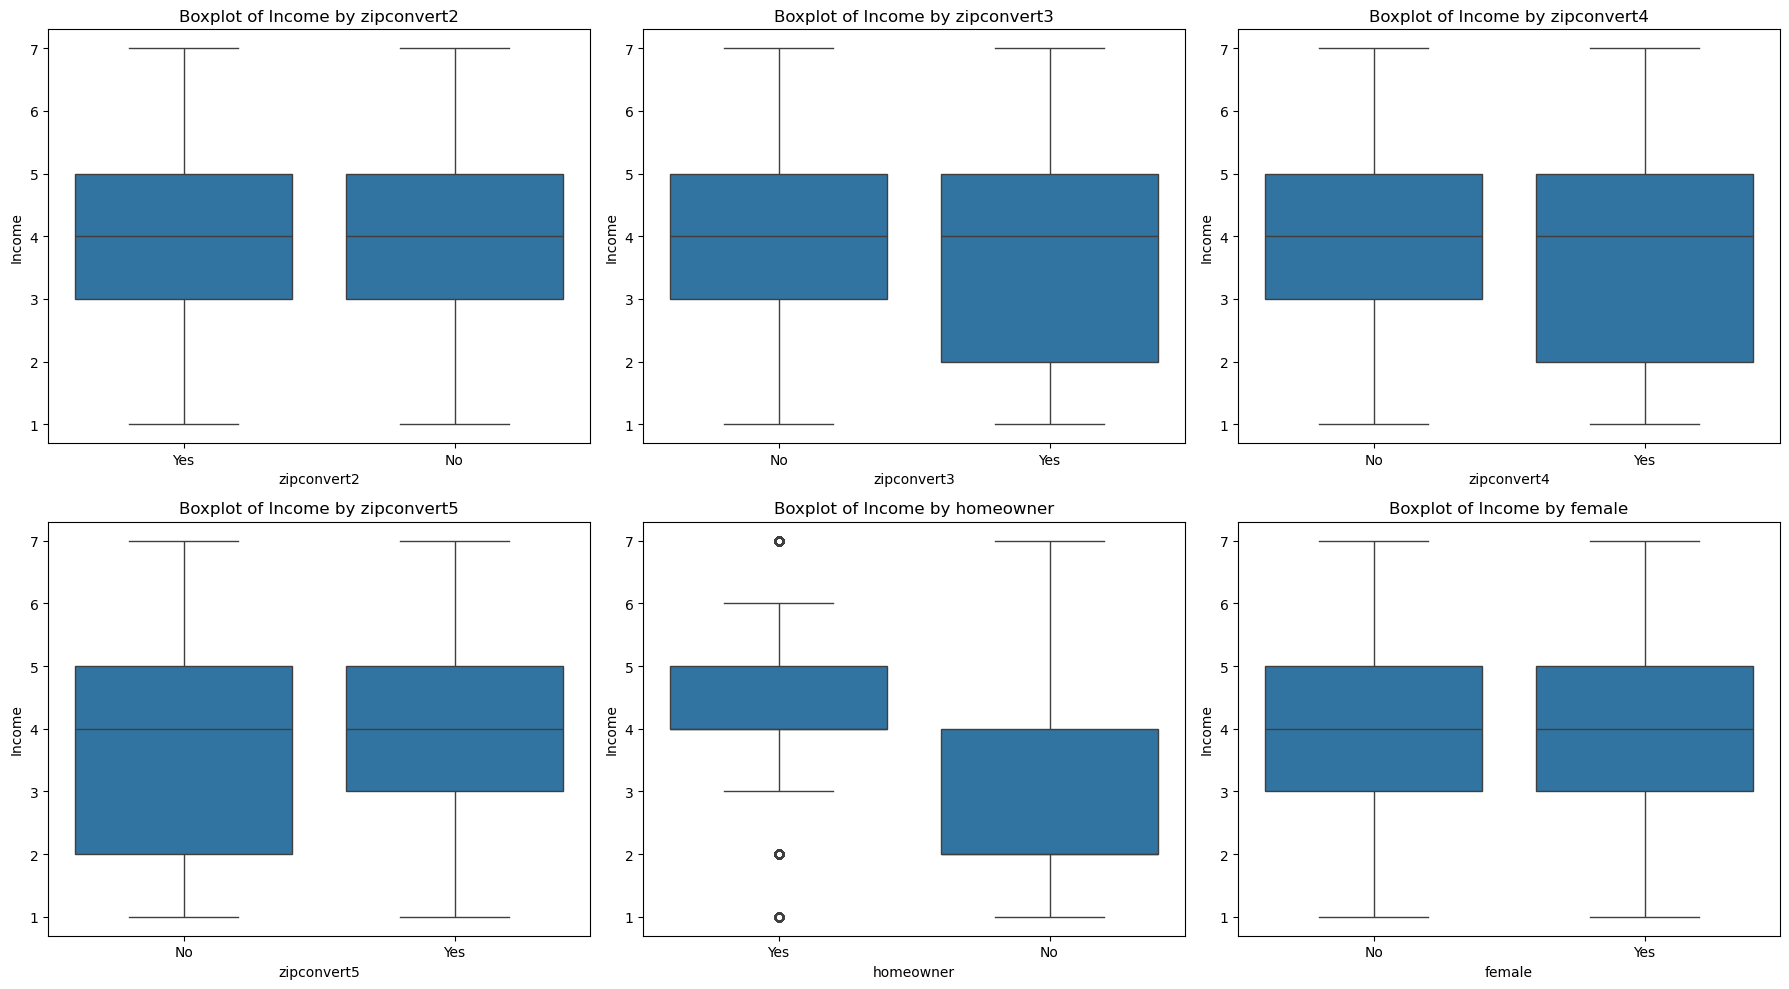


Highly Correlated Pairs (correlation coefficient > 0.7):
   Predictor 1  Predictor 2  Correlation Coefficient
0   home_value  med_fam_inc                 0.738153
1   home_value  avg_fam_inc                 0.752569
2  med_fam_inc  avg_fam_inc                 0.972271
3    last_gift     avg_gift                 0.866400


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of predictors
numeric_predictors = ['num_child', 'income', 'wealth', 'home_value', 'med_fam_inc', 'avg_fam_inc', 'pct_lt15k',
                      'num_prom', 'lifetime_gifts', 'largest_gift', 'last_gift', 'months_since_donate', 'time_lag', 'avg_gift']
categorical_predictors = ['zipconvert2', 'zipconvert3', 'zipconvert4', 'zipconvert5', 'homeowner', 'female']

# Arrange plots in rows of 3 or 4
def plot_in_rows(predictors, ncols=3):
    nrows = (len(predictors) + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))
    axes = axes.flatten()
    for i, predictor in enumerate(predictors):
        ax = axes[i]
        if predictor in numeric_predictors:
            sns.histplot(data[predictor], kde=True, ax=ax)
            ax.set_xlabel(predictor)
        else:
            sns.countplot(x=predictor, hue='target', data=data, ax=ax)
            ax.legend(title='Target', loc='upper right', labels=['Non-donor', 'Donor'])
            ax.set_ylabel('Frequency')
        ax.set_title(f'Distribution of {predictor}')

# Plot numeric predictors
plot_in_rows(numeric_predictors)

# Plot categorical predictors
plot_in_rows(categorical_predictors, ncols=4)

# Correlation analysis
correlation_matrix = data[numeric_predictors].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Predictors')
plt.show()

# Pairplot for numeric predictors
sns.pairplot(data=data, vars=numeric_predictors, hue='target', diag_kind='kde')
plt.suptitle('Pairplot of Numeric Predictors', y=1.02)
plt.show()

# Boxplot for categorical predictors
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()
for i, predictor in enumerate(categorical_predictors):
    sns.boxplot(x=predictor, y='income', data=data, ax=axes[i])
    axes[i].set_title(f'Boxplot of Income by {predictor}')
    axes[i].set_ylabel('Income')
plt.tight_layout()
plt.show()

# Identify highly correlated pairs
highly_correlated_pairs = []
for i in range(len(numeric_predictors)):
    for j in range(i+1, len(numeric_predictors)):
        predictor1 = numeric_predictors[i]
        predictor2 = numeric_predictors[j]
        correlation_coefficient = correlation_matrix.loc[predictor1, predictor2]
        if abs(correlation_coefficient) > 0.7:
            highly_correlated_pairs.append((predictor1, predictor2, correlation_coefficient))

# Highly Correlated Pairs DataFrame
if highly_correlated_pairs:
    highly_correlated_pairs_df = pd.DataFrame(highly_correlated_pairs, columns=["Predictor 1", "Predictor 2", "Correlation Coefficient"])
    print("\nHighly Correlated Pairs (correlation coefficient > 0.7):")
    print(highly_correlated_pairs_df)
else:
    print("\nNo highly correlated pairs found (correlation coefficient > 0.7).")

### 2. Select classification tool and parameters. Run at least two classification models of your choosing. Describe the two models that you chose, with sufficient detail (method, parameters, variables, etc.) so that it can be reproduced.

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1)

# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, subsample=1.0)

# Convert categorical variables to one-hot encoding
X_train_encoded = pd.get_dummies(X_train)
X_val_encoded = pd.get_dummies(X_val)

# Initialize and train the models
rf_classifier.fit(X_train_encoded, y_train)
gb_classifier.fit(X_train_encoded, y_train)

# Predictions
rf_predictions = rf_classifier.predict(X_val_encoded)
gb_predictions = gb_classifier.predict(X_val_encoded)


# Define the evaluate_model function
def evaluate_model(y_true, y_pred, model_name):
    # Convert string labels to binary numeric values
    label_encoder = LabelEncoder()
    y_true_binary = label_encoder.fit_transform(y_true)
    y_pred_binary = label_encoder.transform(y_pred)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true_binary, y_pred_binary)
    precision = precision_score(y_true_binary, y_pred_binary)
    recall = recall_score(y_true_binary, y_pred_binary)
    f1 = f1_score(y_true_binary, y_pred_binary)
    roc_auc = roc_auc_score(y_true_binary, y_pred_binary)
    
    # Return a dictionary containing the evaluation metrics
    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC AUC': roc_auc
    }

# Evaluate Random Forest Classifier
rf_metrics = evaluate_model(y_val, rf_predictions, "Random Forest Classifier")

# Evaluate Gradient Boosting Classifier
gb_metrics = evaluate_model(y_val, gb_predictions, "Gradient Boosting Classifier")

# Create a DataFrame from the evaluation metrics
evaluation_results_2 = pd.DataFrame([rf_metrics, gb_metrics])

# Display the DataFrame
display(evaluation_results_2)

Model  Accuracy  Precision    Recall  F1-score  \
0      Random Forest Classifier  0.535000   0.541379  0.518152  0.529511   
1  Gradient Boosting Classifier  0.553333   0.558140  0.554455  0.556291   

    ROC AUC  
0  0.535170  
1  0.553322

### 3. Classification under asymmetric response and cost. Comment on the reasoning behind using weighted sampling to produce a training set with equal numbers of donors and non-donors? Why not use a simple random sample from the original dataset?

Using weighted sampling to produce a training set with equal numbers of donors and non-donors is a strategy often employed in scenarios where the response variable (in this case, donor or non-donor) is imbalanced, and there is a significant cost associated with misclassifying certain classes. In the context of the fundraising campaign for the veterans' organization, there are several reasons why weighted sampling might be preferred over simple random sampling:

1. **Imbalanced Response Variable:** The response variable, which indicates whether an individual is a donor or non-donor, is often imbalanced in fundraising datasets. In this case, only around 5.1% of individuals are donors, while the majority are non-donors. When training a classification model on imbalanced data, the model might become biased towards the majority class (non-donors) and perform poorly in predicting the minority class (donors).

2. **Cost Implications:** Misclassifying donors as non-donors (false negatives) can be more costly than misclassifying non-donors as donors (false positives) in the context of a fundraising campaign. Donors are the primary source of revenue for the organization, and failing to identify potential donors means missing out on valuable contributions. Therefore, it is crucial to ensure that the model can effectively capture donor behavior.

3. **Model Performance:** By using weighted sampling to balance the classes in the training set, the model is trained on a more representative dataset. This helps mitigate the bias towards the majority class and allows the model to learn the patterns and characteristics of both donors and non-donors more effectively. As a result, the model is likely to achieve better performance, particularly in terms of recall and overall predictive accuracy.

In contrast, using a simple random sample from the original dataset might result in a training set that is heavily skewed towards non-donors, leading to suboptimal model performance, especially in identifying donors. Weighted sampling addresses this issue by ensuring that the training set contains an equal number of donors and non-donors, thereby improving the model's ability to capture both classes effectively.

Overall, weighted sampling is a prudent approach in scenarios where the response variable is imbalanced, and there are asymmetric costs associated with misclassification. It helps improve model performance and ensures that the model is better equipped to identify potential donors, ultimately maximizing the effectiveness of the fundraising campaign.

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv("data/fundraising.csv")

# Separate donors and non-donors
donors = data[data['target'] == 'Donor']
non_donors = data[data['target'] == 'No Donor']

# Determine the number of samples to select for each class (minimum of donors and non-donors)
num_samples = min(len(donors), len(non_donors))

# Sample an equal number of donors and non-donors
sampled_donors = donors.sample(n=num_samples, random_state=123)
sampled_non_donors = non_donors.sample(n=num_samples, random_state=123)

# Combine the sampled donors and non-donors
sampled_data = pd.concat([sampled_donors, sampled_non_donors])

# Shuffle the combined dataset
sampled_data = sampled_data.sample(frac=1, random_state=123)

# Split features and target variable
X = sampled_data.drop(columns=['target'])
y = sampled_data['target']

# Perform one-hot encoding on categorical features in X
X_encoded = pd.get_dummies(X)

# Encode the target variable y
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=123)

# Random Forest Classifier
rf_classifier3 = RandomForestClassifier(n_estimators=100, random_state=123)

# Gradient Boosting Classifier
gb_classifier3 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, subsample=1.0, random_state=123)

# Train the models
rf_classifier3.fit(X_train, y_train)
gb_classifier3.fit(X_train, y_train)

# Predicted probabilities
rf_probabilities3 = rf_classifier3.predict_proba(X_val)[:, 1]
gb_probabilities3 = gb_classifier3.predict_proba(X_val)[:, 1]

# Convert predictions back to original labels for evaluation metrics
rf_predictions3_labels = le.inverse_transform(rf_classifier3.predict(X_val))
gb_predictions3_labels = le.inverse_transform(gb_classifier3.predict(X_val))
y_val_labels = le.inverse_transform(y_val)

# Evaluation metrics
def calculate_metrics(model_name, y_true, y_pred, y_pred_proba):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label="Donor")
    recall = recall_score(y_true, y_pred, pos_label="Donor")
    f1 = f1_score(y_true, y_pred, pos_label="Donor")
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    return {'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1, 'ROC AUC': roc_auc}

# Calculate evaluation metrics for Random Forest Classifier
rf_metrics = calculate_metrics('Random Forest Classifier', y_val_labels, rf_predictions3_labels, rf_probabilities3)

# Calculate evaluation metrics for Gradient Boosting Classifier
gb_metrics = calculate_metrics('Gradient Boosting Classifier', y_val_labels, gb_predictions3_labels, gb_probabilities3)

# Display evaluation results
evaluation_results_3 = pd.DataFrame([rf_metrics, gb_metrics])
display(evaluation_results_3)

Model  Accuracy  Precision    Recall  F1-score  \
0      Random Forest Classifier     0.500    0.48495  0.498282  0.491525   
1  Gradient Boosting Classifier     0.515    0.50000  0.494845  0.497409   

    ROC AUC  
0  0.510893  
1  0.520824

### 4. Evaluate the fit. Examine the out of sample error for your models. Use tables or graphs to display your results. Is there a model that dominates?

In [10]:
display(evaluation_results_2)

Accuracy  Precision    Recall  F1-score  \
Model                                                                   
Random Forest Classifier      0.535000   0.541379  0.518152  0.529511   
Gradient Boosting Classifier  0.553333   0.558140  0.554455  0.556291   

                               ROC AUC  
Model                                   
Random Forest Classifier      0.535170  
Gradient Boosting Classifier  0.553322

It looks like the Random Forest Classiuer is consistently better in our evaluation metrics.

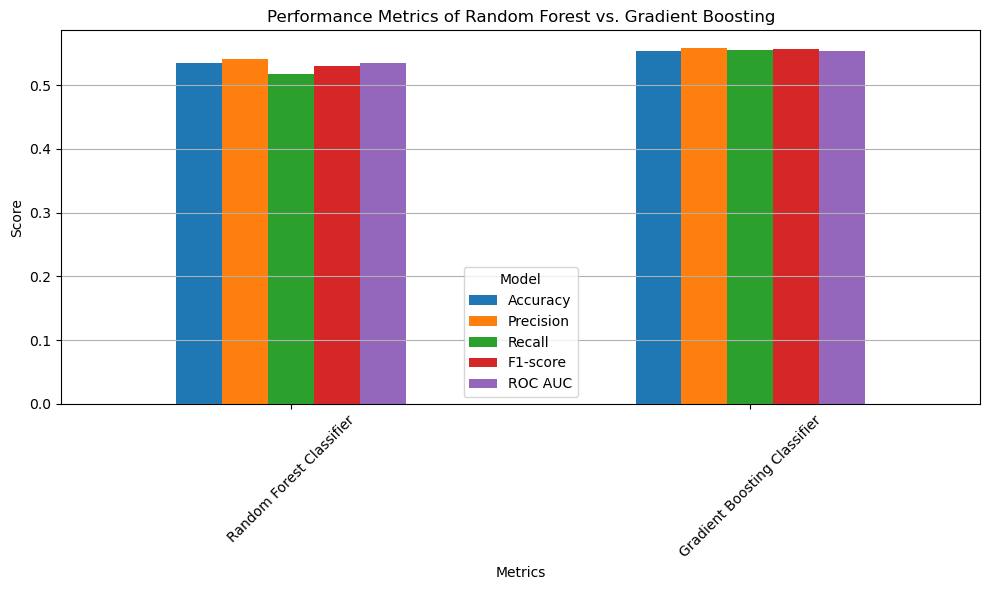

In [8]:
import matplotlib.pyplot as plt

# Set the model names as the index
evaluation_results_2.set_index('Model', inplace=True)

# Plot the performance metrics
evaluation_results_2.plot(kind='bar', figsize=(10, 6))
plt.title('Performance Metrics of Random Forest vs. Gradient Boosting')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


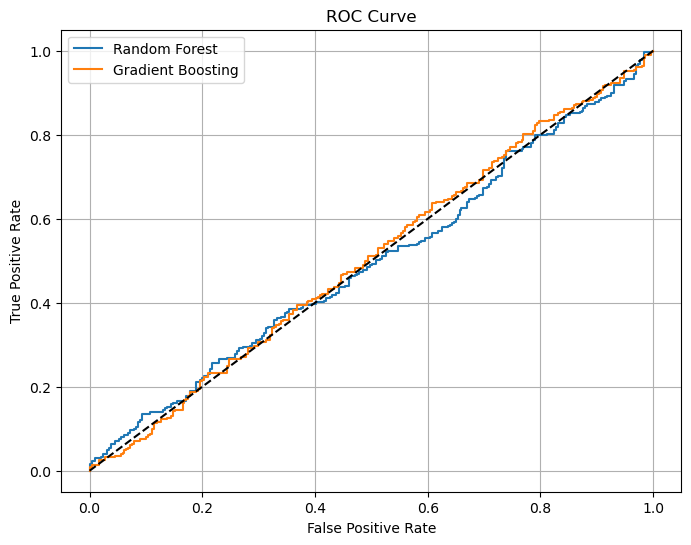

In [11]:
from sklearn.metrics import roc_curve

# Encode the target variable y_val
label_encoder = LabelEncoder()
y_val_encoded = label_encoder.fit_transform(y_val)

# Predicted probabilities for Random Forest Classifier
rf_probabilities = rf_classifier.predict_proba(X_val_encoded)[:, 1]

# Predicted probabilities for Gradient Boosting Classifier
gb_probabilities = gb_classifier.predict_proba(X_val_encoded)[:, 1]

# Compute ROC curve for Random Forest Classifier
rf_fpr, rf_tpr, _ = roc_curve(y_val_encoded, rf_probabilities)

# Compute ROC curve for Gradient Boosting Classifier
gb_fpr, gb_tpr, _ = roc_curve(y_val_encoded, gb_probabilities)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label='Random Forest')
plt.plot(gb_fpr, gb_tpr, label='Gradient Boosting')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


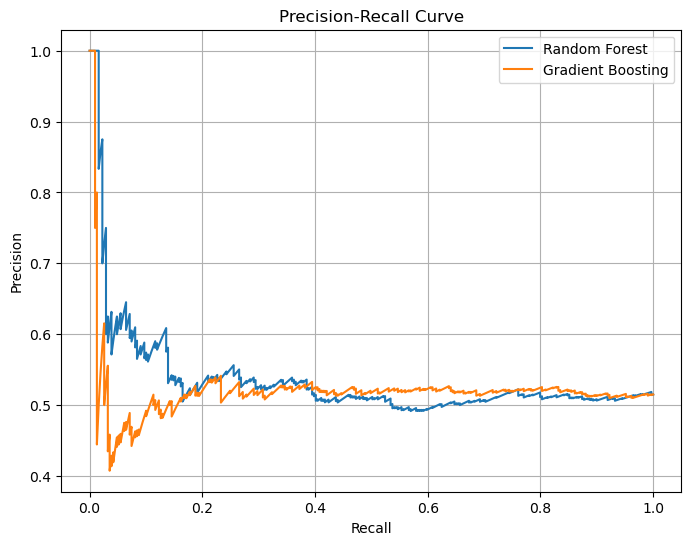

In [13]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve for Random Forest Classifier
rf_precision, rf_recall, _ = precision_recall_curve(y_val_encoded, rf_probabilities)

# Compute Precision-Recall curve for Gradient Boosting Classifier
gb_precision, gb_recall, _ = precision_recall_curve(y_val_encoded, gb_probabilities)

# Plot Precision-Recall curves
plt.figure(figsize=(8, 6))
plt.plot(rf_recall, rf_precision, label='Random Forest')
plt.plot(gb_recall, gb_precision, label='Gradient Boosting')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()


### 5. Select best model. From your answer in (4), what do you think is the “best” model?

Based on these results, the Random Forest Classifier has slightly higher accuracy, precision, F1-score, and ROC AUC compared to the Gradient Boosting Classifier. However, the differences in performance metrics between the two models are relatively small.

Therefore, the best model would likely depend on the specific priorities of the task. If we prioritize overall performance across multiple metrics, the Random Forest Classifier might be preferred. However, if interpretability or computational efficiency is a concern, the Gradient Boosting Classifier might be a better choice.

Ultimately, it's essential to consider the trade-offs and requirements of the problem domain when selecting the best model.

Determining the percentage of data to allocate for a mailing campaign involves balancing several factors to achieve the most effective outcome. Here are some recommendations to consider when deciding on the percentage of data for the campaign:

1. **Response Rate Analysis**: Analyze past mailing campaign data to understand the response rate. Determine the proportion of recipients who responded positively to the campaign in the past. This can serve as a baseline for estimating the expected response rate for the current campaign.

2. **Cost-Benefit Analysis**: Evaluate the cost associated with the mailing campaign, including production and postage costs, against the potential benefits such as donations or customer acquisitions. Calculate the expected return on investment (ROI) based on historical data and campaign goals.

3. **Segmentation Strategy**: Segment the donor database based on factors such as past donation history, demographics, or behavioral attributes. Allocate a higher percentage of data to segments that have shown higher response rates in the past or are more likely to generate significant returns.

4. **Testing and Optimization**: Allocate a portion of the data (e.g., 10-20%) for testing different campaign strategies, messaging, or creative elements. Use A/B testing or multivariate testing to identify the most effective approach before rolling out the campaign to the entire dataset.

5. **Risk Mitigation**: Consider allocating a conservative percentage of data initially to minimize the risk associated with the campaign. Gradually increase the percentage based on the performance of early mailings and response rates.

6. **Resource Constraints**: Take into account any limitations or constraints such as budget, manpower, or production capacity. Ensure that the allocated percentage of data is manageable within the available resources.

Based on these considerations, I would recommend initially allocating around 10-20% of the dataset for the mailing campaign. This allows for testing different strategies, minimizing risk, and optimizing the campaign before scaling up to a larger percentage of data. As the campaign progresses and performance metrics are monitored, adjustments can be made to the allocation percentage to maximize effectiveness and ROI.